Bismilla Hirrahmanirraheem

In [19]:
!pip install Faker


  Using cached Faker-33.3.1-py3-none-any.whl.metadata (15 kB)
Using cached Faker-33.3.1-py3-none-any.whl (1.9 MB)


In [22]:
# Importing different python Libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from faker import Faker
from datetime import datetime, timedelta

In [24]:
# Initialize Faker
fake = Faker()

# Number of rows for the dataset
num_rows = 20000

# Generate columns
data = {
    "Transaction_ID": [fake.uuid4() for _ in range(num_rows)],
    "Date": [fake.date_between(start_date="-2y", end_date="today") for _ in range(num_rows)],
    "Customer_ID": [random.randint(1000, 9999) for _ in range(num_rows)],
    "Customer_Name": [fake.name() for _ in range(num_rows)],
    "Region": [random.choice(["North", "South", "East", "West"]) for _ in range(num_rows)],
    "Product_Category": [random.choice(["Electronics", "Clothing", "Furniture", "Toys", "Books"]) for _ in range(num_rows)],
    "Product_Name": [random.choice(["Laptop", "Shirt", "Sofa", "Doll", "Novel"]) for _ in range(num_rows)],
    "Quantity_Sold": [random.randint(1, 10) for _ in range(num_rows)],
    "Price_per_Unit": [round(random.uniform(5, 500), 2) for _ in range(num_rows)],
    "Discount": [round(random.uniform(0, 0.5), 2) for _ in range(num_rows)],
    "Total_Sales": [0] * num_rows  # Placeholder for calculation
}

# Calculate Total Sales
data["Total_Sales"] = [
    round(data["Quantity_Sold"][i] * data["Price_per_Unit"][i] * (1 - data["Discount"][i]), 2)
    for i in range(num_rows)
]

# Create DataFrame
sales_data = pd.DataFrame(data)

# Save dataset to CSV
sales_data.to_csv("Sales_Trend_Dataset.csv", index=False)





In [25]:
df = pd.read_csv('Sales_Trend_Dataset.csv')

#checking the first 5 rows of data using .head()
df.head()

,Transaction_ID,Date,Customer_ID,Customer_Name,Region,Product_Category,Product_Name,Quantity_Sold,Price_per_Unit,Discount,Total_Sales
0,60e11d78-e5fd-4d16-958c-6075b427e30a,2024-04-17,6227,Todd Baker,East,Furniture,Shirt,7,88.38,0.21,488.74
1,b89fda99-8efa-428c-925c-6f1d56b99ada,2024-08-28,1375,Stephanie Jones,East,Electronics,Shirt,9,468.42,0.33,2824.57
2,d091961f-f91b-43ec-8b4f-bcbec6f93805,2023-10-21,8741,Jessica Carroll,North,Books,Sofa,3,364.51,0.07,1016.98
3,75d86d40-663e-49c5-8ef9-f2b37012d396,2024-09-15,8348,Amy Bryan,North,Clothing,Novel,9,307.59,0.38,1716.35
4,159d8ab4-7267-4b58-a8e5-83f1405c1eda,2023-04-03,5800,Eric Jenkins,South,Clothing,Novel,5,391.78,0.16,1645.48


In [26]:
df.shape
#our dataset contain 20k rows and 11 column

(20000, 11)

In [27]:
#checking for missing values

df.isnull()

,Transaction_ID,Date,Customer_ID,Customer_Name,Region,Product_Category,Product_Name,Quantity_Sold,Price_per_Unit,Discount,Total_Sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
19995,False,False,False,False,False,False,False,False,False,False,False
19996,False,False,False,False,False,False,False,False,False,False,False
19997,False,False,False,False,False,False,False,False,False,False,False
19998,False,False,False,False,False,False,False,False,False,False,False


In [28]:
#checking sum of null value from each column
df.isnull().sum()

#so we can see no null values exist in our data set

Transaction_ID      0
Date                0
Customer_ID         0
Customer_Name       0
Region              0
Product_Category    0
Product_Name        0
Quantity_Sold       0
Price_per_Unit      0
Discount            0
Total_Sales         0
dtype: int64

In [29]:

#checing duplicate values
df.duplicated()
df.duplicated().sum()

np.int64(0)

In [30]:
# Drop duplicates if any
df = df.drop_duplicates()

In [31]:
df['Date']
#here Date is object data type, need to convert in datetime data type

0        2024-04-17
1        2024-08-28
2        2023-10-21
3        2024-09-15
4        2023-04-03
            ...    
19995    2024-08-13
19996    2023-03-31
19997    2023-04-23
19998    2023-12-23
19999    2023-05-26
Name: Date, Length: 20000, dtype: object

In [32]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0       2024-04-17
1       2024-08-28
2       2023-10-21
3       2024-09-15
4       2023-04-03
           ...    
19995   2024-08-13
19996   2023-03-31
19997   2023-04-23
19998   2023-12-23
19999   2023-05-26
Name: Date, Length: 20000, dtype: datetime64[ns]

In [33]:
import datetime as dt
#Now we need to separate date in day, month and year
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [34]:
df.head(2)

,Transaction_ID,Date,Customer_ID,Customer_Name,Region,Product_Category,Product_Name,Quantity_Sold,Price_per_Unit,Discount,Total_Sales,Day,Month,Year
0,60e11d78-e5fd-4d16-958c-6075b427e30a,2024-04-17,6227,Todd Baker,East,Furniture,Shirt,7,88.38,0.21,488.74,17,4,2024
1,b89fda99-8efa-428c-925c-6f1d56b99ada,2024-08-28,1375,Stephanie Jones,East,Electronics,Shirt,9,468.42,0.33,2824.57,28,8,2024


In [35]:
# Handle outliers (e.g., Total_Sales should not be negative)
df = df[df['Total_Sales'] >= 0]


<Axes: ylabel='Total_Sales'>

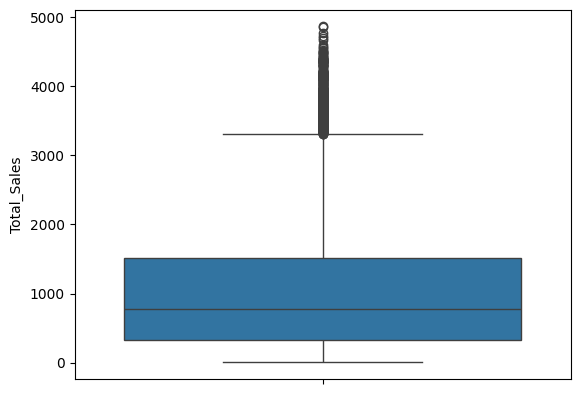

In [36]:
#checking outliers
sns.boxplot(df['Total_Sales'])
#plt.boxplot('Total_Sales')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    20000 non-null  object        
 1   Date              20000 non-null  datetime64[ns]
 2   Customer_ID       20000 non-null  int64         
 3   Customer_Name     20000 non-null  object        
 4   Region            20000 non-null  object        
 5   Product_Category  20000 non-null  object        
 6   Product_Name      20000 non-null  object        
 7   Quantity_Sold     20000 non-null  int64         
 8   Price_per_Unit    20000 non-null  float64       
 9   Discount          20000 non-null  float64       
 10  Total_Sales       20000 non-null  float64       
 11  Day               20000 non-null  int32         
 12  Month             20000 non-null  int32         
 13  Year              20000 non-null  int32         
dtypes: datetime64[ns](1), 

In [38]:
df.shape

(20000, 14)

# Exploratory Data Analysis

In [39]:
#Now I will save this clean data set first then I will do EDA

df.to_csv('Cleaned_data_set.csv', index = False)

In [42]:
df = pd.read_csv('Cleaned_data_set.csv')

In [131]:
df.head()

,Transaction_ID,Date,Customer_ID,Customer_Name,Region,Product_Category,Product_Name,Quantity_Sold,Price_per_Unit,Discount,Total_Sales,Day,Month,Year
0,63dec929-7ba7-456a-af0f-4b0873bfd56a,2024-12-14,8162,Kelli Pratt,North,Clothing,Laptop,5,303.15,0.41,894.29,14,12,2024
1,ecd8287f-723a-4807-a8f0-60e1322bee16,2023-09-02,5603,Shawn Kane,South,Electronics,Sofa,5,262.73,0.02,1287.38,2,9,2023
2,37aaf779-533e-4897-8144-b07c52d3e273,2024-09-16,6647,Arthur Johnson,South,Toys,Doll,4,349.41,0.22,1090.16,16,9,2024
3,2fc83623-1843-4dad-b106-c5c1a3cb59c7,2023-09-19,1738,Maria Murray,West,Toys,Laptop,4,95.38,0.22,297.59,19,9,2023
4,8aa7fc50-f6db-4125-8ead-4c53c6504cc2,2024-07-02,7263,Renee Green,North,Clothing,Doll,3,242.81,0.14,626.45,2,7,2024


In [43]:
#checking the statistic of this data set or summary of this data set
df.describe()

,Customer_ID,Quantity_Sold,Price_per_Unit,Discount,Total_Sales,Day,Month,Year
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.00000
mean,5486.323550,5.475700,252.225945,0.250469,1034.947746,15.70355,6.541050,2023.56585
std,2596.841401,2.871519,142.842496,0.145389,894.825566,8.78887,3.451291,0.55098
min,1000.000000,1.000000,5.040000,0.000000,2.880000,1.00000,1.000000,2023.00000
25%,3236.000000,3.000000,127.937500,0.120000,321.535000,8.00000,4.000000,2023.00000
50%,5477.500000,5.000000,251.935000,0.250000,769.420000,16.00000,7.000000,2024.00000
75%,7729.250000,8.000000,376.232500,0.380000,1519.560000,23.00000,10.000000,2024.00000
max,9999.000000,10.000000,499.980000,0.500000,4870.600000,31.00000,12.000000,2025.00000


In [44]:
#Sleas Trend Over Time

monthly_sales = df.groupby('Month')['Total_Sales']
monthly_sales.sum()

Month
1     1700736.03
2     1552746.21
3     1764671.25
4     1655775.41
5     1829720.72
6     1759850.06
7     1634612.36
8     1699036.14
9     1788969.65
10    1867234.83
11    1674856.19
12    1770746.08
Name: Total_Sales, dtype: float64

In [45]:
monthly_sales = df.groupby('Month')['Total_Sales'].sum().reset_index()
monthly_sales

,Month,Total_Sales
0,1,1700736.03
1,2,1552746.21
2,3,1764671.25
3,4,1655775.41
4,5,1829720.72
5,6,1759850.06
6,7,1634612.36
7,8,1699036.14
8,9,1788969.65
9,10,1867234.83


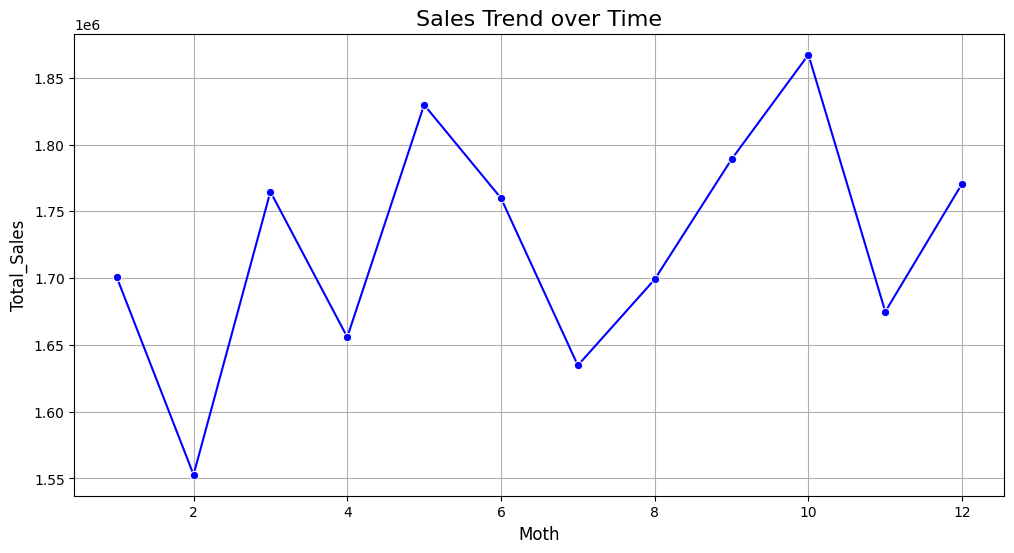

In [46]:
#plotting sales trend

plt.figure(figsize=(12,6))
sns.lineplot(x = 'Month', y = 'Total_Sales', data = monthly_sales, marker = 'o', color = 'blue')
plt.title("Sales Trend over Time", fontsize = 16)
plt.xlabel("Moth", fontsize = 12)
plt.ylabel("Total_Sales", fontsize = 12)
#plt.xticks(rotation = 45)
plt.grid()
plt.show()

In [47]:
# This line plot shows the fluctuation of sales over months.

In [48]:
#Total Sales by region

region_sales = df.groupby('Region')['Total_Sales'].sum().reset_index()
region_sales

,Region,Total_Sales
0,East,5206826.54
1,North,5108150.77
2,South,5144649.77
3,West,5239327.85


C:\Users\hp\AppData\Local\Temp\ipykernel_18568\3715237329.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Region', y = 'Total_Sales', data = region_sales, palette='viridis')


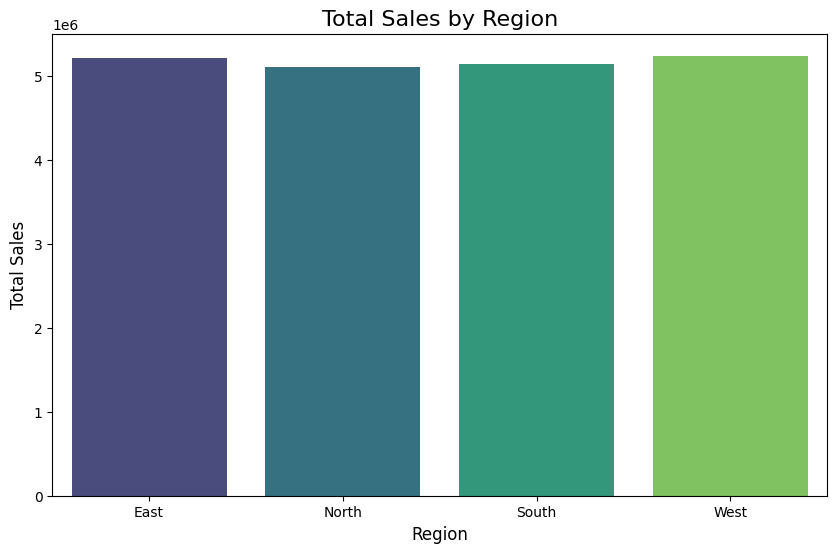

In [50]:
#import plotly.express as px
#plotting bar chart to visualize sales from different region

plt.figure(figsize=(10,6))
sns.barplot(x = 'Region', y = 'Total_Sales', data = region_sales, palette='viridis')
plt.title("Total Sales by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
#plt.grid()
plt.show()

In [51]:
#Region such as West contributed the highest sales, while South lagged behind.

In [52]:
#Top 5 performing Products

top5_products = df.groupby('Product_Name')['Total_Sales'].sum().reset_index()
top5_products

,Product_Name,Total_Sales
0,Doll,4076309.96
1,Laptop,4200234.74
2,Novel,4267883.19
3,Shirt,4083284.52
4,Sofa,4071242.52


C:\Users\hp\AppData\Local\Temp\ipykernel_18568\3106095536.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Sales', y = 'Product_Name', data = top5_products, palette='viridis',)


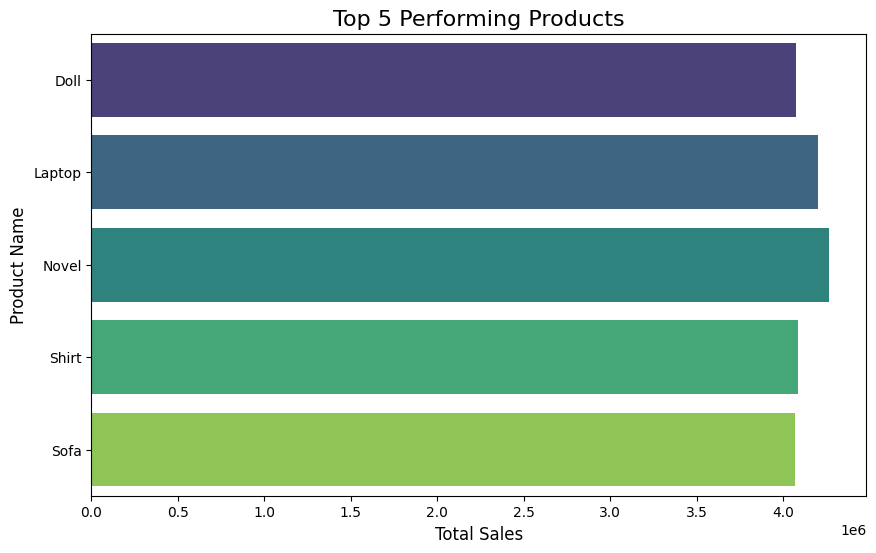

In [53]:
plt.figure(figsize = (10,6))
sns.barplot(x='Total_Sales', y = 'Product_Name', data = top5_products, palette='viridis',)
plt.title("Top 5 Performing Products", fontsize=16)
plt.xlabel("Total Sales", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.show()

In [54]:
#Products like Doll and Novel generated the highest revenue, followed by items like Laptop and Shirt

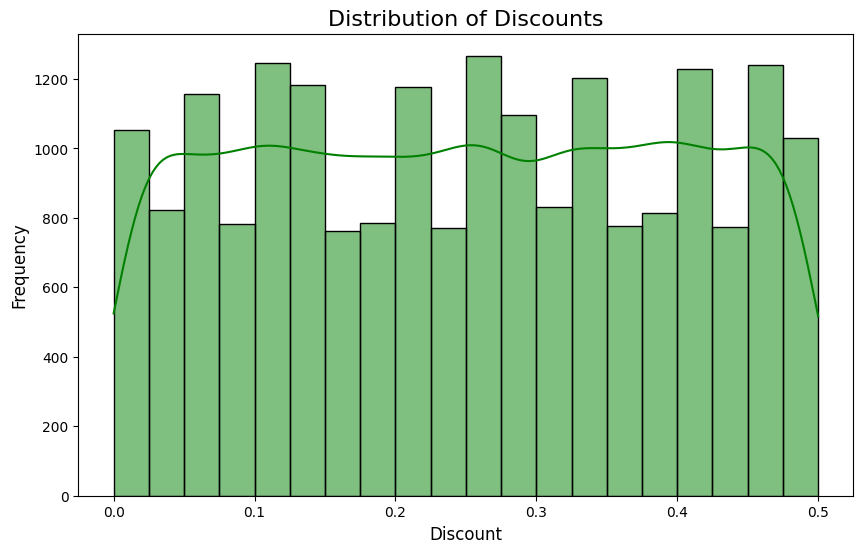

In [55]:
#How discount is being distributed

plt.figure(figsize=(10,6))
sns.histplot(df['Discount'], bins = 20, kde=True, color = 'green')
plt.title("Distribution of Discounts", fontsize=16)
plt.xlabel("Discount", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

In [ ]:
#Discounts were typically between 0% and 50%, with the majority clustered around 20%-30%.

In [56]:
df.head()

,Transaction_ID,Date,Customer_ID,Customer_Name,Region,Product_Category,Product_Name,Quantity_Sold,Price_per_Unit,Discount,Total_Sales,Day,Month,Year
0,60e11d78-e5fd-4d16-958c-6075b427e30a,2024-04-17,6227,Todd Baker,East,Furniture,Shirt,7,88.38,0.21,488.74,17,4,2024
1,b89fda99-8efa-428c-925c-6f1d56b99ada,2024-08-28,1375,Stephanie Jones,East,Electronics,Shirt,9,468.42,0.33,2824.57,28,8,2024
2,d091961f-f91b-43ec-8b4f-bcbec6f93805,2023-10-21,8741,Jessica Carroll,North,Books,Sofa,3,364.51,0.07,1016.98,21,10,2023
3,75d86d40-663e-49c5-8ef9-f2b37012d396,2024-09-15,8348,Amy Bryan,North,Clothing,Novel,9,307.59,0.38,1716.35,15,9,2024
4,159d8ab4-7267-4b58-a8e5-83f1405c1eda,2023-04-03,5800,Eric Jenkins,South,Clothing,Novel,5,391.78,0.16,1645.48,3,4,2023


In [57]:
# Needs to add profit column to visualize profit over product and it's category
df['profit'] = df.Discount*df.Total_Sales
df.head()
profit = df['profit']
Profit = df.groupby('Product_Name')['profit'].sum().reset_index()
Profit

,Product_Name,profit
0,Doll,910226.4140
1,Laptop,917296.1829
2,Novel,941953.8541
3,Shirt,912896.2787
4,Sofa,908088.9045


C:\Users\hp\AppData\Local\Temp\ipykernel_18568\3746654656.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = 'profit', x = 'Product_Name', data = Profit, palette='viridis')


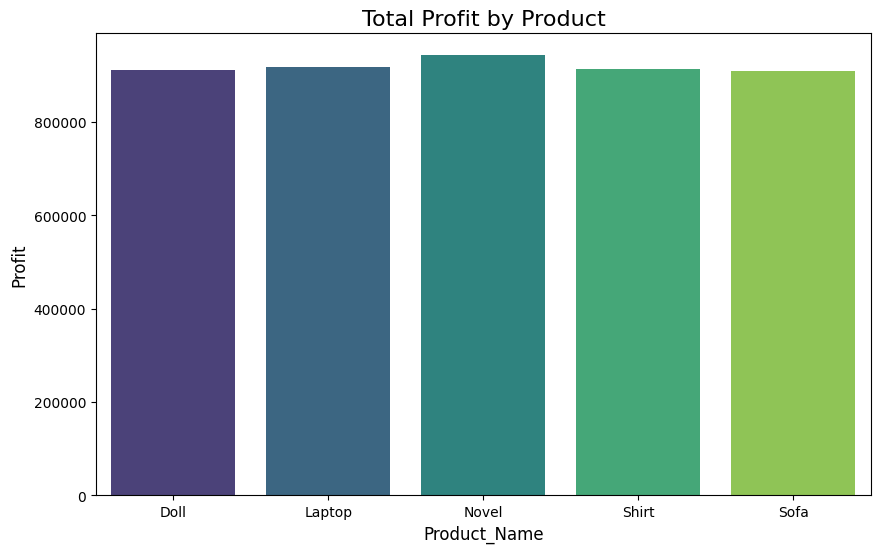

In [58]:
plt.figure(figsize=(10,6))
sns.barplot(y = 'profit', x = 'Product_Name', data = Profit, palette='viridis')
plt.title("Total Profit by Product", fontsize=16)
plt.xlabel("Product_Name", fontsize=12)
plt.ylabel("Profit", fontsize=12)
#plt.grid()
plt.show()

In [59]:
profit_category = df.groupby('Product_Category')['profit'].sum().reset_index()
profit_category

,Product_Category,profit
0,Books,932572.1652
1,Clothing,917037.6264
2,Electronics,908833.0217
3,Furniture,922768.2042
4,Toys,909250.6167


C:\Users\hp\AppData\Local\Temp\ipykernel_18568\767620369.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(y = 'profit', x = 'Product_Category', data = profit_category, palette='viridis')


Text(0, 0.5, 'Profit')

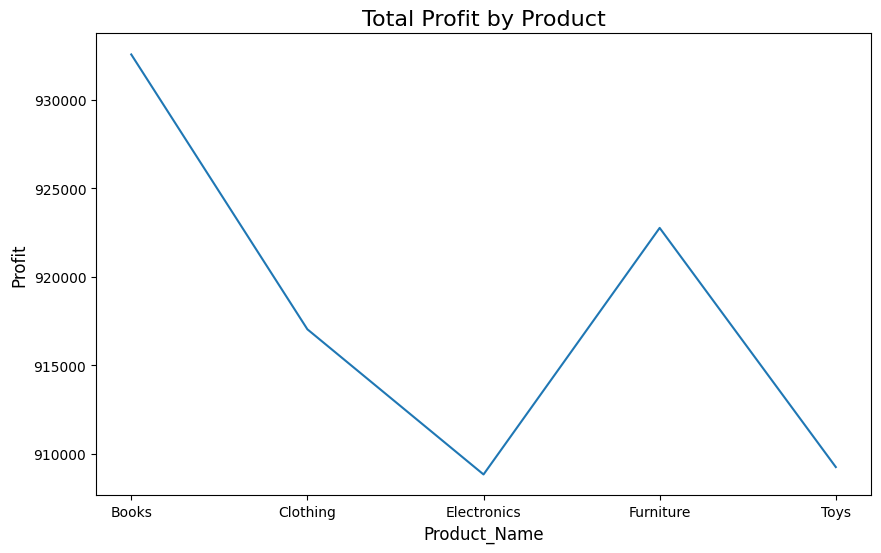

In [60]:
plt.figure(figsize=(10,6))
sns.lineplot(y = 'profit', x = 'Product_Category', data = profit_category, palette='viridis')
plt.title("Total Profit by Product", fontsize=16)
plt.xlabel("Product_Name", fontsize=12)
plt.ylabel("Profit", fontsize=12)
#plt.grid()

In [61]:
profit_region = df.groupby('Region')['profit'].sum().reset_index()
profit_region

,Region,profit
0,East,1.168584e+06
1,North,1.131775e+06
2,South,1.133999e+06
3,West,1.156103e+06


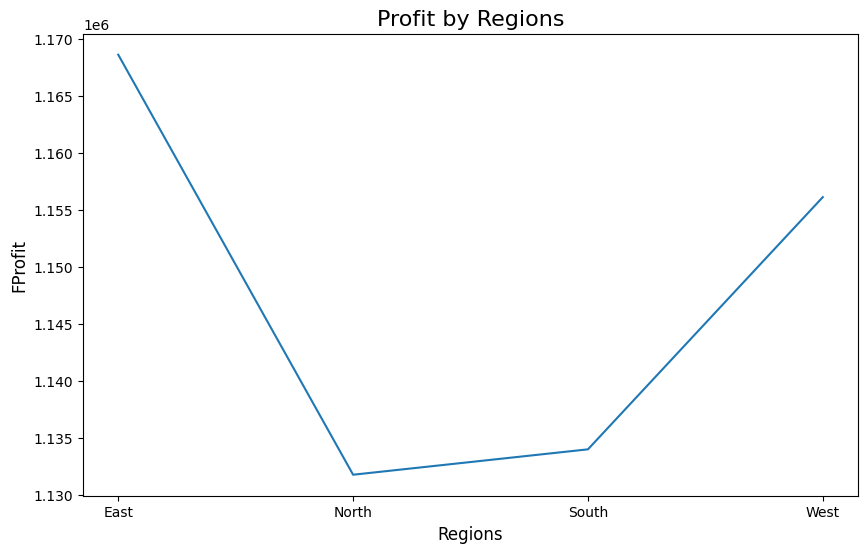

In [62]:
#How discount is being distributed

plt.figure(figsize=(10,6))
sns.lineplot(x = 'Region', y = 'profit', data = profit_region)
plt.title("Profit by Regions", fontsize=16)
plt.xlabel("Regions", fontsize=12)
plt.ylabel("FProfit", fontsize=12)
plt.show()